```python
import numpy as np
import time

# Helper class to measure execution time
class Timer:
    def __init__(self, msg: str):
        self.msg = msg

    def __enter__(self):
        self.start = time.perf_counter()

    def __exit__(self, exc_type, exc_value, traceback):
        print(f"{self.msg}: {time.perf_counter() - self.start}")

# Input Data
n = 4194240
numpy_data = np.full(n, 3, dtype=np.int32)

with Timer("for in range loop"):
    res = []
    for x in numpy_data:
        res.append(x * x)
```

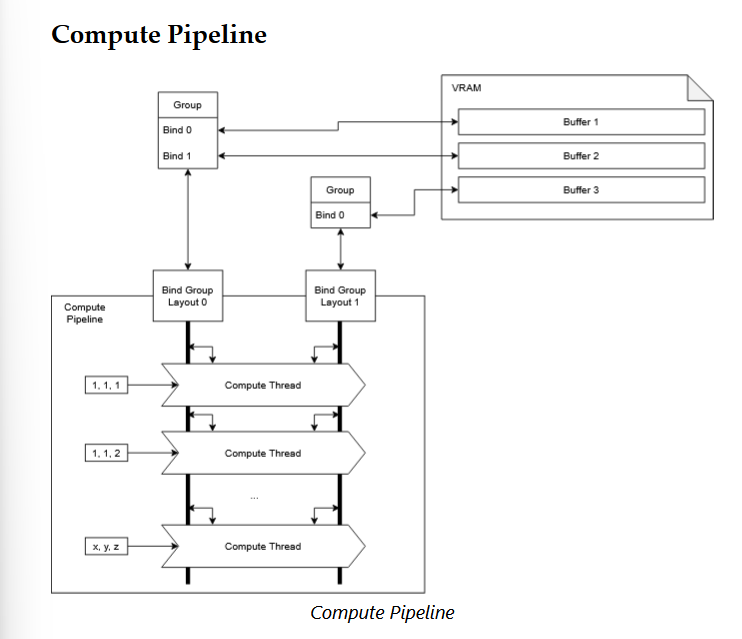


* les buffers contiennent des données et y'en a qui sont faits pour écrire des données

* pour utiliser les modules GPU on installe avec un pip:
---
```powershell
pip install wgpu
```

---

* il faut toujours appeler le device cela permet l'accès aux methodes.

--- 

 * Création d'un buffer : il faut toujours definir les nombres de taille qui est en octet puis avoir un STORAGE et une COPY_SRC

---
 ```python
 from wgpu import BufferUsage

# input data
buffer0 = device.create_buffer_with_data(data=numpy_data, usage=BufferUsage.STORAGE)

# for the output
buffer1 = device.create_buffer(
      size=numpy_data.nbytes,
      usage=BufferUsage.STORAGE | BufferUsage.COPY_SRC,
)
```
---

* création des bind Group 

Généralement ils sont déclarés dans un dictionnaire.

```python 
# declaration de bind group 
bind_group_layout = device.create_bind_group_layout(
    entries=[
        {
            "binding": 0,
            "visibility": ShaderStage.COMPUTE,
            "buffer": {"type": BufferBindingType.read_only_storage},
        },
        {
            "binding": 1,
            "visibility": ShaderStage.COMPUTE,
            "buffer": {"type": BufferBindingType.storage},
        },
    ]
)
```

---
 * Pour la création des Pipeline : on a besoin de code source, et le bind_group_layouts est la somme des tous les autres.

 ```python
 # Load the source code to execute on the GPU
with open("compute.wgsl") as file:
    shader_source = file.read()

shader_module = device.create_shader_module(code=shader_source)

# A Pipeline may use multiple Bind Group
pipeline_layout = device.create_pipeline_layout(
    bind_group_layouts=[bind_group_layout]
)

pipeline = device.create_compute_pipeline(
    layout=pipeline_layout,
    compute={
        "module": shader_module,
        "entry_point": "main",
    },
)
```

---
 * Pour le WGSL language: 

 index : vec3<u32> est definit comme nombre avec trois entitiés et pour accéder on fonctionne avec index.x (y/z)

 


# Documentation 

* UV : est un outil qui permet la gestion de Python (en gros il joue le rôle de super pip + virtualvenv + pipx + pip-tools en ultra rapide). 

- Pour créer des environnements virtuels : uv venv
- Pour installer des dépendances :
    - uv add
    - uv install ...
- pour gérer plusieurs versions de python :
    - uv python install ...

- Il permet ça car il écrit en Rust.

### Setup du projet GPU (Python + uv)

---

####  1. Pré-requis

- Python 3.12 installé : `pip install uv`
- `uv` installé et accessible dans le terminal 
- Git : recommandé

---

####  2 Création et activation de l'environnement virtuel


`python -m venv .venv`
`.\.venv\Scripts\Activate.ps1`

- Rust 
`uv venv`
`.\.venv\Scripts\Activate.ps1`


---


#### 3 Initialisation du projet avec uv


`uv init --name gpu-project`

ça créera un fichier pyprojet.toml à la racine du projet :

---
####  4 Ajout des dépendances
`uv add numpy`
`uv add torch`

Ainsi les dépendances sont ajoutés dans le fichier.

---

####  5 on lance le fichier main.py qui est déja crée :

`python main.py`

---

#### 6 Pour résumer en mode “mémo”

- `gpu_project` = **nom du projet** 
- `uv init --name ...` = crée un **projet Python moderne** avec `pyproject.toml`.
- `pyproject.toml` = **remplace/englobe l’idée de `requirements.txt`**, + métadonnées, + config outils.
- `uv add` = ajoute des libs proprement dans `pyproject.toml` (plus besoin d’éditer à la main).




## Debut labo1

### J'ai copié le code et collé pour voir ce que cela donne 



In [1]:
import numpy as np
import time

# Helper class to measure execution time
class Timer:
    def __init__(self, msg: str):
        self.msg = msg

    def __enter__(self):
        self.start = time.perf_counter()

    def __exit__(self, exc_type, exc_value, traceback):
        print(f"{self.msg}: {time.perf_counter() - self.start}")

# Input Data
n = 4194240
numpy_data = np.full(n, 3, dtype=np.int32)

with Timer("for in range loop"):
    res = []
    for x in numpy_data:
        res.append(x * x)


with Timer("numpy operation") as rep:
    res = numpy_data * numpy_data

for in range loop: 0.7309822000006534
numpy operation: 0.06265730000086478


j'ai cela et ça change à chaque run : `il faut trouver d'où vient le problème`

## Compute Pipeline 

`Attention ` 

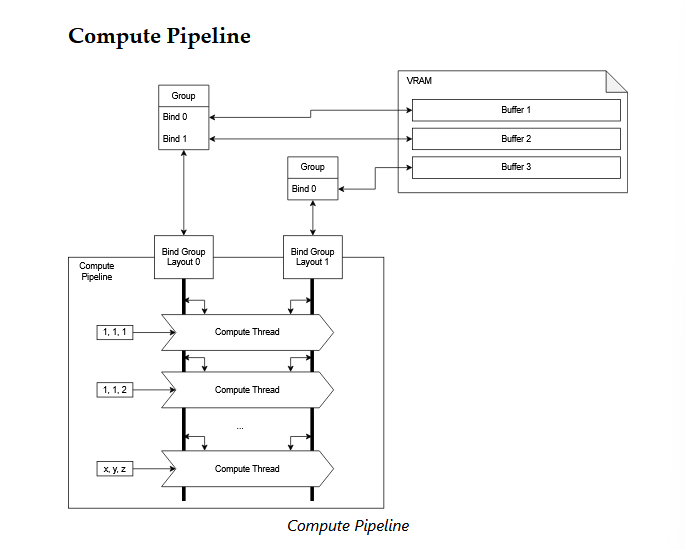


## Use WebGPU with python 

Je dois installer le `wgpu` : `uv add wgpu`

* Get a Logical Device

In [2]:
from wgpu import gpu

adapter = gpu.request_adapter_sync(power_preference="high-performance")
device = adapter.request_device_sync()

## Création des Buffers 

* Create Buffer :

In [3]:
from wgpu import BufferUsage

# input data
buffer0 = device.create_buffer_with_data(data=numpy_data, usage=BufferUsage.STORAGE)

# for the output
buffer1 = device.create_buffer(
      size=numpy_data.nbytes,
      usage=BufferUsage.STORAGE | BufferUsage.COPY_SRC,
)

In [4]:
# Bind Group Layout

from wgpu import ShaderStage, BufferBindingType

bind_group_layout = device.create_bind_group_layout(
    entries=[
        {
            "binding": 0,
            "visibility": ShaderStage.COMPUTE,
            "buffer": {"type": BufferBindingType.read_only_storage},
        },
        {
            "binding": 1,
            "visibility": ShaderStage.COMPUTE,
            "buffer": {"type": BufferBindingType.storage},
        },
    ]
)

# Describe the bindings needed in the Bind Group used by the compute operation


In [5]:
# Compute Pipeline
# Load the source code to execute on the GPU
with open("compute.wgsl") as file:
    shader_source = file.read()

shader_module = device.create_shader_module(code=shader_source)

# A Pipeline may use multiple Bind Group
pipeline_layout = device.create_pipeline_layout(
    bind_group_layouts=[bind_group_layout]
)

pipeline = device.create_compute_pipeline(
    layout=pipeline_layout,
    compute={
        "module": shader_module,
        "entry_point": "main",
    },
)

In [6]:
# Bind Group
# We must create the Bind Group now

bind_group = device.create_bind_group(
    layout=bind_group_layout,
    entries=[
        {
            "binding": 0,
            "resource": {
                "buffer": buffer0,
                "offset": 0,
                "size": buffer0.size,
            },
        },
        {
            "binding": 1,
            "resource": {
                "buffer": buffer1,
                "offset": 0,
                "size": buffer1.size,
            },
        },
    ],
)


In [7]:
# Run the pipeline

from wgpu import GPUCommandEncoder, GPUComputePassEncoder

with Timer("Compute Pipeline"):
    command_encoder: GPUCommandEncoder = device.create_command_encoder()

    compute_pass: GPUComputePassEncoder = command_encoder.begin_compute_pass()

    compute_pass.set_pipeline(pipeline)
    compute_pass.set_bind_group(0, bind_group)
    compute_pass.dispatch_workgroups(n // 64, 1, 1)
    compute_pass.end()

    device.queue.submit([command_encoder.finish()])

Compute Pipeline: 0.12625739999930374


In [8]:
# Get data back

out: memoryview = device.queue.read_buffer(buffer1)
result = np.frombuffer(out.cast("i"), dtype=np.int32)
print(result)

[9 9 9 ... 9 9 9]
